# **Mandatory Assignment - FIE463**


### <ins> _Import necessary libraries:_ </ins>


In [2]:
import numpy as np  # Used for array operations
import matplotlib.pyplot as plt  # Used for plotting
import sympy as sp  # Used to solve equations

## <ins>**Task 1: Expected Return**</ins>

In this task, we calculate the expected value of the risky return, $E[R]$, given its three possible outcomes and associated probabilities:

$
R =
\begin{cases}
1 + \mu + \epsilon & \text{with probability } \pi_{\mathrm{hi}} = 0.5,\\
1 + \mu - \epsilon & \text{with probability } \pi_{\mathrm{lo}} = 0.45,\\
1 + \mu - 3\epsilon & \text{with probability } \pi_{\mathrm{crash}} = 0.05.
\end{cases}
$

The expected risky return $E[R]$ is the sum of each outcome multiplied by its probability:

$
E[R] = \pi_{\mathrm{hi}} (1 + \mu + \epsilon)
     + \pi_{\mathrm{lo}} (1 + \mu - \epsilon)
     + \pi_{\mathrm{crash}} (1 + \mu - 3\epsilon).
$

After calculating the $E[R]$, we verify that the risk premium $E[R] - R_f$ is positive, where $R_f$ is the risk-free rate (assumed to be 1).


In [3]:
# Parameters
pi_hi = 0.5  # Probability of high outcome
pi_lo = 0.45  # Probability of low outcome
pi_crash = 0.05  # Probability of crash outcome
mu = 0.06  # Risk premium parameter
epsilon = 0.2  # Volatility parameter
Rf = 1.0  # Risk-free rate


# Function to to calculate the expected return. --> Created to be used for parameter selection in task 8.
def expected_return(mu, epsilon):
    """
    Calculate the expected return of the risky asset.

    Parameters
    ----------
    mu : float
        Risk premium parameter.
    epsilon : float
        Volatility parameter.

    Returns
    -------
    E_R: float
        The expected return of the risky asset.
    """
    # Possible returns of the risky asset
    R_hi = 1 + mu + epsilon  # High return
    R_lo = 1 + mu - epsilon  # Low return
    R_crash = 1 + mu - 3 * epsilon  # Crash return

    # Expected risky return E[R]
    E_R = pi_hi * R_hi + pi_lo * R_lo + pi_crash * R_crash

    return E_R


E_R = expected_return(mu, epsilon)

# Risk premium
risk_premium = E_R - Rf

# Print the results
print(f"Expected Risky Return, E[R] = {E_R:.4f}")
print(f"Risk Premium, E[R] - Rf   = {risk_premium:.4f}")

# Check if the risk premium is positive
print("Is E[R] - Rf > 0?", risk_premium > 0)

Expected Risky Return, E[R] = 1.0400
Risk Premium, E[R] - Rf   = 0.0400
Is E[R] - Rf > 0? True


## <ins>**Task 2: Utility Function**</ins>

In this task, we define a function to compute the **flow utility**, $u(c)$, for a given consumption level $c$ and risk aversion parameter $\gamma$. We use a **CRRA** (constant relative risk aversion) utility function, which specializes to the logarithmic case when $\gamma = 1$:

$
u(c) = \begin{cases}
    \frac{c^{1-\gamma}}{1-\gamma} & \text{if } \gamma \neq 1 \\
    \log(c) & \text{if } \gamma = 1
    \end{cases}
$

The function below accepts either a scalar or NumPy array for $c$ and returns the corresponding utility value(s).


In [4]:
# Utility function
def util(c, gamma):
    """
    CRRA utility function

    Parameters
    ----------
    c : float or numpy.array
        Consumption level(s). Must be positive.
    gamma : float
        Risk aversion coefficient.
        - If gamma = 1, utility is log(c).
        - Otherwise, utility is c^(1-gamma) / (1-gamma).

    Returns
    -------
    u: float or numpy.array
        The per-period utility for the given consumption level(s).
    """
    # Utility for log preferences
    if gamma == 1:
        u = np.log(c)
    else:
        # Utility for general CRRA preferences
        u = c ** (1.0 - gamma) / (1.0 - gamma)
    # Return the utility
    return u

### <ins>Testing the Utility Function</ins>

Below, we test our function to ensure that our `util(c, gamma)` works properly under different scenarios:

1. **Check $\gamma = 1$ (Log Utility):**  
   a) For a scalar input $c$.  
   b) For an array input $c$.

2. **Check $\gamma \neq 1$ (CRRA Utility):**  
   a) For a scalar input $c$.  
   b) For an array input $c$.

We validate that:

- The outputs match known mathematical values (e.g., $\ln(1) = 0$).
- The function handles both **scalar** and **NumPy array** inputs without error.


In [5]:
# 1) Test gamma = 1 (Log Utility)
print("---------------------------------------------------")
print("TEST 1: gamma = 1 (Log Utility)")
print("---------------------------------------------------")
# a) Scalar input (2.0)
c_scalar = 2.0
u_scalar_log = util(c_scalar, 1)
print(f"Scalar input c = {c_scalar}, gamma = 1 -> utility = {u_scalar_log:.4f}")
# We expect this to be ln(2.0)
print(f"Expected ln(2.0) = {np.log(2.0):.4f}\n")

# b) Array input
c_array = np.array([1.0, 2.0, 4.0])
u_array_log = util(c_array, 1)
print(f"Array input c = {c_array}, gamma = 1 -> utility = {u_array_log}")
# We expect [ln(1.0), ln(2.0), ln(4.0)]
print(f"Expected [0, ln(2.0), ln(4.0)] = {[np.log(1.0), np.log(2.0), np.log(4.0)]}\n")


# 2) Test gamma != 1 (CRRA Utility)
print("---------------------------------------------------")
print("TEST 2: gamma != 1 (CRRA Utility)")
print("---------------------------------------------------")

# Gamme = 3, which is not equal to 1
gamma_crra = 3.0

# a) Scalar input
c_scalar2 = 2.0
u_scalar_crra = util(c_scalar2, gamma_crra)
print(
    f"Scalar input c = {c_scalar2}, gamma = {gamma_crra} -> utility = {u_scalar_crra:.6f}"
)

# Expected value computed by hand for c=2, gamma=3:
# u = 2^(1 - 3) / (1 - 3) = -0.125
print("Expected value for c=2, gamma=3 -> -0.125\n")

# b) Array input
c_array2 = np.array([1.0, 2.0, 3.0])
u_array_crra = util(c_array2, gamma_crra)
print(f"Array input c = {c_array2}, gamma = {gamma_crra} -> utility = {u_array_crra}")

# Expected value computed by hand for c=[1, 2, 3], gamma=3:
# u(1) = 1^(1-3)/(1-3) = -0.5
# u(2) = 2^(-2)/(-2) = -0.125
# u(3) = 3^(-2)/(-2) ≈ -0.055556
expected_crra_vals = [-0.5, -0.125, -1 / 18]
print(f"Expected values = {expected_crra_vals}")

---------------------------------------------------
TEST 1: gamma = 1 (Log Utility)
---------------------------------------------------
Scalar input c = 2.0, gamma = 1 -> utility = 0.6931
Expected ln(2.0) = 0.6931

Array input c = [1. 2. 4.], gamma = 1 -> utility = [0.         0.69314718 1.38629436]
Expected [0, ln(2.0), ln(4.0)] = [np.float64(0.0), np.float64(0.6931471805599453), np.float64(1.3862943611198906)]

---------------------------------------------------
TEST 2: gamma != 1 (CRRA Utility)
---------------------------------------------------
Scalar input c = 2.0, gamma = 3.0 -> utility = -0.125000
Expected value for c=2, gamma=3 -> -0.125

Array input c = [1. 2. 3.], gamma = 3.0 -> utility = [-0.5        -0.125      -0.05555556]
Expected values = [-0.5, -0.125, -0.05555555555555555]


## <ins>**Task 3: Expected Lifetime Utility Function**</ins>

Next, we define a function `expected_util(s, alpha, beta, gamma, epsilon, mu, w)` that computes the **expected lifetime utility** for an investor who consumes in two periods. We will use the `util(c, gamma)` function from <ins>**Task 2**</ins> to evaluate the flow utility.

The first-period consumption is

$
c_1 = w - s,
$

where $w$ is the initial wealth and $s$ is the amount saved in period 1.

In period 2, the investor allocates a fraction $ \alpha $ of savings $ s $ to the risky asset and $ (1 - \alpha) $ to the risk-free asset $ R_f = 1 $. As we saw earlier, the risky asset can take three possible returns. Hence, the second-period consumption $ c_2 $ depends on the realized return:

$
c_{2,\mathrm{hi}} = (1 + \mu + \epsilon) \times \alpha\,s  + R_f(1 - \alpha)\,s,
$

$
c_{2,\mathrm{lo}} =  (1 + \mu - \epsilon) \times \alpha\,s  + R_f(1 - \alpha)\,s,
$

$
c_{2,\mathrm{crash}} = (1 + \mu - 3\,\epsilon) \times \alpha\,s  + R_f(1 - \alpha)\,s.
$

We then compute the **expected utility** for period 2:

$$
\mathbb{E}[u(c_2)]
= \pi_{\mathrm{hi}}\,u(c_{2,\mathrm{hi}})
+ \pi_{\mathrm{lo}}\,u(c_{2,\mathrm{lo}})
+ \pi_{\mathrm{crash}}\,u(c_{2,\mathrm{crash}}),
$$

Since future utility is **less valuable** than present utility, we **discount** this term by multiplying by the **discount factor** $\beta$, and then combine it with the **first-period utility** $u(c_1)$. This yields the **total expected lifetime utility**:

$$
\text{expected} \text{ util}
= u(c_1) \;+\; \beta\,\mathbb{E}[u(c_2)].
$$

The code below implements this in Python, allowing both **scalar** and **NumPy array** inputs for $ s $ and $ \alpha $.


In [ ]:
# The parameters pi_hi, pi_lo, pi_crash, and Rf have already been defined in prior cells as per the instructions.
# Thus, we will use them directly in the function without redefining them here.
# We also calculated the risky asset returns R_hi, R_lo, and R_crash in prior cells, under the expected_return function.
# However, we will redefine them as the function above do not return these values,
# and the function we will create takes the parameters that are used to calculate them as inputs.


# Expected lifetime utility function
def expected_util(
    s, alpha, beta=0.9, gamma=3, epsilon=0.2, mu=0.06, w=1.0
):  # Default values for beta, gamma, epsilon, mu, and w
    """
    Computes the expected lifetime utility for given parameters.

    Parameters
    ----------
    s : float or numpy.array
        Amount saved in period 1.
    alpha : float or numpy.array
        Fraction of savings invested in the risky asset.
    beta : float
        Discount factor (0 < beta <= 1).
        Default: 0.9
    gamma : float
        Risk aversion coefficient for CRRA utility.
        Default: 3
    epsilon : float
        Volatility parameter for the risky asset's return.
        Default: 0.2
    mu : float
        Risk premium parameter for the risky asset's return.
        Default: 0.06
    w : float
        Initial wealth (assumed to be positive).
        Default: 1.0

    Returns
    -------
    u: float or numpy.array
        The total expected lifetime utility.
    """
    # First-period consumption
    c1 = w - s

    # Expected utility for period-1 consumption
    E_u_c1 = util(c1, gamma)

    # Possible returns of the risky asset
    R_hi = 1 + mu + epsilon  # High return
    R_lo = 1 + mu - epsilon  # Low return
    R_crash = 1 + mu - 3 * epsilon  # Crash return

    # Second-period consumption for each outcome
    c2_hi = R_hi * alpha * s + Rf * (1 - alpha) * s
    c2_lo = R_lo * alpha * s + Rf * (1 - alpha) * s
    c2_crash = R_crash * alpha * s + Rf * (1 - alpha) * s

    # Expected utility for period-2 consumption
    E_u_c2 = (
        pi_hi * util(c2_hi, gamma)
        + pi_lo * util(c2_lo, gamma)
        + pi_crash * util(c2_crash, gamma)
    )

    # Total expected lifetime utility (period-1 utility + discounted expected utility of period-2)
    u = E_u_c1 + beta * E_u_c2

    # Return the total expected lifetime utility
    return u

## <ins>**Task 4: Expected Lifetime Utility Plot**</ins>

In this task we will use the `expected_util` function from <ins>**Task 3**</ins> to compute the utility values over a grid of 200 savings levels ($s$) spanning uniformly over the interval $[\,0.1,\; w - 0.1\,]$. The $ \alpha $ parameter will be set to three different values: $ \{0, 0.5, 1\} $.

We will then plot the **expected lifetime utility** for each $ \alpha $ value against the savings grid ($s$).


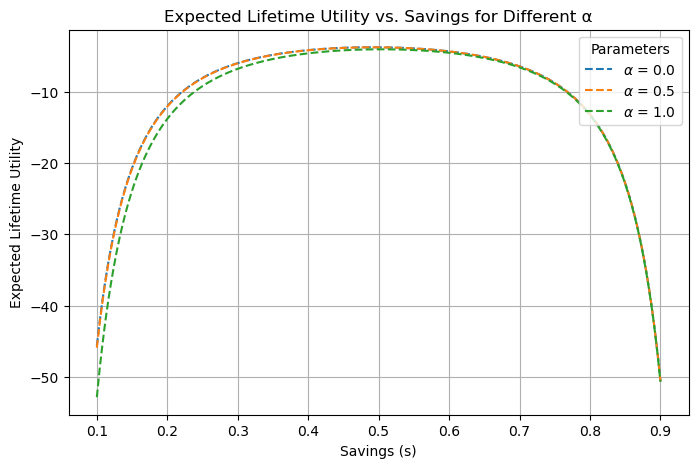

In [7]:
# Parameter needed outside the expected_util function
w = 1.0

# Create a grid of savings levels s that are uniformly spaced between 0.1 and w - 0.1
s_vals = np.linspace(0.1, w - 0.1, 200)

# Define the three alpha values
alphas = [0.0, 0.5, 1.0]


# Function to plot the expected lifetime utility over a grid of savings values for different alphas
def plot_expected_utility(
    s_vals, alphas, beta=0.9, gamma=3, epsilon=0.2, mu=0.06, w=1.0
):
    """
    Plot the expected lifetime utility over a grid of savings values for given alpha values.

    Parameters
    ----------
    s_vals : array-like
        Grid of savings values on the interval [0, w], e.g. np.linspace(0.1, w-0.1, 200).
    alpha_values : list or array-like
        A set of alpha values, e.g. [0.0, 0.5, 1.0], to plot on the same figure.
    beta : float
        Discount factor.
        Default: 0.9
    gamma : float
        Risk aversion parameter for the CRRA utility.
        Default: 3
    epsilon : float
        Volatility parameter for the risky asset's return.
        Default: 0.2
    mu : float
        Risk premium parameter for the risky asset's return.
        Default: 0.06
    w : float
        Initial wealth.
        Default: 1.0

    Returns
    -------
    None
        Displays a matplotlib plot of expected lifetime utility vs. savings (s) for each alpha.
    """

    # Prepare a figure
    plt.figure(figsize=(8, 5))

    # Compute and plot expected lifetime utility for each alpha
    for alpha in alphas:
        # Compute expected utility for each s in s_vals
        util_values = [
            expected_util(s, alpha, beta=beta, gamma=gamma, epsilon=epsilon, mu=mu, w=w)
            for s in s_vals
        ]  # List comprehension
        # Prepare the label for the legend
        label_str = rf"$\alpha$ = {alpha}"

        # Ploy the expected utility values
        plt.plot(s_vals, util_values, label=label_str, ls="--")

    # Add labels, title, legend, grid, and show the plot
    plt.xlabel("Savings (s)")  # Add x-axis label
    plt.ylabel("Expected Lifetime Utility")  # Add y-axis label
    plt.title("Expected Lifetime Utility vs. Savings for Different α")  # Add title
    # Add legend to the upper right corner with the title "Parameters"
    plt.legend(loc="upper right", title="Parameters")
    plt.grid(True)  # Add grid
    plt.show()  # Show the plot


# Run function to plot the expected lifetime utility
plot_expected_utility(s_vals, alphas)

### <ins>Graph Intuition</ins>:

When $s$ is very low, the first-period consumption is high ($c_1 = w - s$), and the second-period consumption is low. This is good for immediate utility but bad for future utility, resulting in a small discounted second-period utility. Conversely, when $s$ is high, the first-period consumption is low, and the second-period consumption is high. This is bad for immediate utility but good for future utility, resulting in a high discounted second-period utility. Because of this trade-off, each curve has a peak somewhere in between, reflecting an optimal savings level that maximizes the expected lifetime utility (optimal balance between present and future consumption).

Differences across the three $\alpha$ values arise because higher $\alpha$ increases exposure to the risky asset, leading to higher expected returns (we saw in <ins>**Task 1**</ins> the risk premium was positive) but also higher risk. As a result, the peak when $\alpha$ increases is shifted upward (higher peak utility) but may also shift the location of the optimum. Thus, each $\alpha$ shows a single-peaked shape, with its maximum depending on the risk-return trade-off. If the fixed $\gamma$ paramenter was set to a lower value, but greater than 0, the differences between the $\alpha$ curves would be more pronounced.

It is important to note that the shape of this curve (concave) is due to the investors risk preferences. Our investor is **risk-averse** since the $\gamma$ parameter is $>0$. If the investor were **risk-neutral** ($\gamma = 0$), the curve would be linear, and if the investor were **risk-loving** ($\gamma < 0$), the curve would be convex.


## <ins>**Task 5: Grid Search**</ins>

In this task, we want to define a function `find_optimum` to **locate the optimal savings level**, $s_{\text{opt}}$, and **risky share** $\alpha_{\text{opt}}$ that **maximize** the **expected lifetime utility** function,`expected_util`, using a **grid search**. The steps we will undertake are:

1. Construct a **grid** of $s$ values in the interval $\bigl[10^{-6},\,w - 10^{-6}\bigr]$ with 1000 points that are **uniformly spaced**.
2. Construct a **grid** of $\alpha$ values in the interval $[\,0,1\,]$ with 1000 points that are **uniformly spaced**.
3. **Evaluate** the expected utility for **every** combination of $(s, \alpha)$ in a **vectorized** fashion.
4. **Identify** the combination that **maximizes** the expected utility:
   $
   \bigl(s_{\text{opt}},\;\alpha_{\text{opt}},\;U_{\max}\bigr).
   $

Because $s$ must be **slightly more than** 0 and **less than** $w$, we exclude the endpoints 0 and $w$ by using a small offset $10^{-6}$. This ensures that $c_1 = w - s$ is never exactly zero, and that the resulting utility is well-defined.


In [8]:
# Grid search for optimal savings level and risky share
def find_optimum(beta=0.9, gamma=3, epsilon=0.2, mu=0.06, w=1.0):
    """
    Find the optimal savings level s and risky share alpha to maximize expected utility
    using a grid sea
    rch.

    Parameters
    ----------
    beta : float
        Discount factor.
        Default: 0.9
    gamma : float
        Risk aversion coefficient.
        Default: 3.0
    epsilon : float
        Volatility parameter for the risky asset's return.
        Default: 0.2
    mu : float
        Risk premium parameter for the risky asset's return.
        Default: 0.06
    w : float
        Initial wealth (assumed positive).
        Default: 1.0

    Returns
    -------
    s_opt : float
        The savings level s that maximizes expected utility.
    alpha_opt : float
        The fraction of savings in the risky asset that maximizes expected utility.
    U_max : float
        The maximum expected lifetime utility achieved.
    """
    # Number of points in the grid
    grid_points = 1000

    # Candidate grids for s in [1e-6, w - 1e-6]
    s_grid = np.linspace(1e-6, w - 1e-6, grid_points)
    # Candidate grids for alpha in [0, 1]
    alpha_grid = np.linspace(0.0, 1.0, grid_points)

    # Create a 2D mesh for s and alpha, and unpack it
    S, A = np.meshgrid(s_grid, alpha_grid, indexing="ij")
    # By choosing indexing='ij', S will have the same values along the rows and A along the columns

    # Evaluate expected utility in a vectorized way
    U = expected_util(S, A, beta=beta, gamma=gamma, epsilon=epsilon, mu=mu, w=w)

    # Find the index of the maximum value in U
    imax = np.argmax(U)
    i_opt, j_opt = np.unravel_index(imax, U.shape)

    # Extract the maximizing values for s, alpha, and corresponding utility
    s_opt = S[i_opt, j_opt]
    alpha_opt = A[i_opt, j_opt]
    U_max = U[i_opt, j_opt]

    return s_opt, alpha_opt, U_max

## <ins>**Task 6: Maximum Expected Lifetime Utility**</ins>

In this task, we will use the **grid_search** function, `find_optimum`, from <ins>**Task 5**</ins> to find the optimal savings level $s_{\text{opt}}$ and risky share $\alpha_{\text{opt}}$ that maximize the expected lifetime utility. We will then report the two optimal values and the corresponding maximum expected lifetime utility $U_{\max}$.


In [9]:
# Run the grid search function and unpack the results
s_opt, alpha_opt, U_max = find_optimum()

# Print the results
print(f"Optimal Savings Level (s_opt) = {s_opt:.4f}")
print(f"Optimal Risky Share (alpha_opt) = {alpha_opt:.4f}")
print(f"Maximum Expected Lifetime Utility (U_max) = {U_max:.4f}")

Optimal Savings Level (s_opt) = 0.4905
Optimal Risky Share (alpha_opt) = 0.2272
Maximum Expected Lifetime Utility (U_max) = -3.7793


## <ins>**Task 7: Effect of Risk Aversion on Optimal Risky Share**</ins>

In this task, we study how the **optimal risky share**, denoted $\alpha_\text{opt}$, depends on the **risk aversion** parameter $\gamma$. The steps we will undertake are:

1. **Define** a function that will compute the optimal risky share $\alpha_\text{opt}$ and plot it against $\gamma$.
2. Inside the fuction we **create** a **grid** of 101 values for $\gamma$ ranging from 1 to 10 that are **uniformly spaced**.
3. For each value of $\gamma$, we **compute** the **optimal** $\alpha$ ($\alpha_\text{opt}$) using our `find_optimum` function.
4. We then **plot** the resulting optimal risky share $\alpha_\text{opt}$ against $\gamma$.
5. Finally, we **discuss** how increasing $\gamma$ (becoming more risk averse) affects the investor’s optimal allocation to the risky asset.


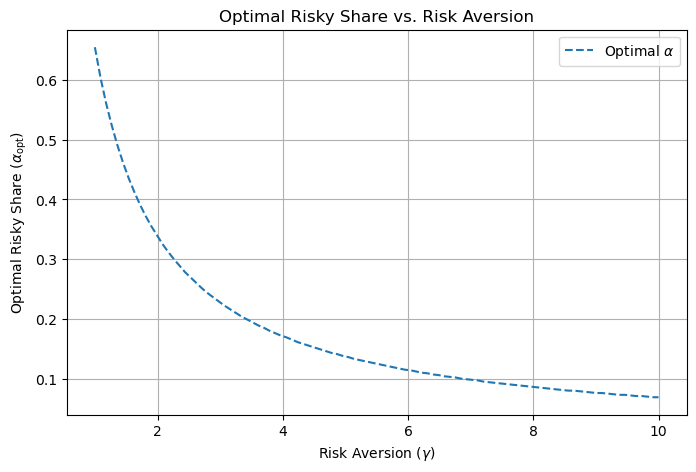

In [10]:
# Risk aversion impact function that plots the optimal riksy share alpha for a range of gamma values
def analyze_risk_aversion_effect(
    gamma_min=1.0,
    gamma_max=10.0,
    gamma_points=101,
    beta=0.9,
    epsilon=0.2,
    mu=0.06,
    w=1.0,
):
    """
    Computes and plots the optimal risky share alpha for a range of gamma values.
    Only alpha is unpacked from the `find_optimum` function.

    Parameters
    ----------
    gamma_min : float
        Minimum gamma in the grid.
        Default: 1.0
    gamma_max : float
        Maximum gamma in the grid.
        Default: 10.0
    gamma_points : int
        Number of gamma points.
        Default: 101
    beta : float
        Discount factor.
        Default: 0.9
    epsilon : float
        Volatility parameter for the risky asset's return.
        Default: 0.2
    mu : float
        Risk premium parameter for the risky asset's return.
        Default: 0.06
    w : float
        Initial wealth.
        Default: 1.0.

    Returns
    -------
    None
        Displays a matplotlib plot of the optimal risky share alpha vs. risk aversion gamma.
    """
    # Create a grid for gamma values
    gamma_grid = np.linspace(gamma_min, gamma_max, gamma_points)

    # Array to store the optimal alpha (empty initially)
    alpha_opt_array = np.zeros(gamma_points)

    # Loop over gamma values and find the optimal alpha for each
    for i, gamma_val in enumerate(gamma_grid):  # Enumerate to get both index and value
        # Use find_optimum to get the best alpha.
        # For this task, we only care about alpha.
        _, alpha_opt, _ = find_optimum(
            beta=beta, gamma=gamma_val, epsilon=epsilon, mu=mu, w=w
        )
        # Store the optimal alpha in the array for plotting
        alpha_opt_array[i] = alpha_opt

    # Plot alpha_opt as a function of gamma
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.plot(
        gamma_grid, alpha_opt_array, label=r"Optimal $\alpha$", ls="--"
    )  # Plot the optimal alpha
    plt.xlabel(r"Risk Aversion $(\gamma)$")  # Set the x-axis label
    plt.ylabel(r"Optimal Risky Share $(\alpha_\text{opt})$")  # Set the y-axis label
    plt.title("Optimal Risky Share vs. Risk Aversion")  # Set the title
    plt.grid(True)  # Add grid
    plt.legend()  # Add legend
    plt.show()  # Show the plot


# Run the function to analyze the impact of risk aversion
analyze_risk_aversion_effect()

### <Ins>Graph Discussion</ins>:

As risk aversion increases (higher $\gamma$), the investor becomes more conservative and prefers to allocate more wealth to the risk-free asset. This is because a higher $\gamma$ implies a stronger aversion to risk, leading to a lower optimal risky share $\alpha_\text{opt}$. The graph show a decreasing relationship between $\alpha_\text{opt}$ and $\gamma$, reflecting this risk-return trade-off.


## <ins>**Task 8: Effect of the Volatility of Risky Returns on Optimal Risky Share**</ins>

In this task, we study how the **optimal risky share**, denoted $\alpha_\text{opt}$, varies with the **volatility** parameter $\epsilon$. The steps mirror those from <ins>**Task 7**</ins>, except we use a grid for $\epsilon$ instead of $\gamma$:

1. **Define** a function to compute and plot the optimal $\alpha_\text{opt}$ against $\epsilon$.
2. **Create** a 101-point grid for $\epsilon$ over $[0.01,\,0.35]$.
3. **Call** `find_optimum` to get $\alpha_\text{opt}$ for each $\epsilon$.
4. **Plot** $\alpha_\text{opt}$ versus $\epsilon$.
5. Finally, we **discuss** how changes in volatility $\epsilon$ influences the investor’s risky share choice.


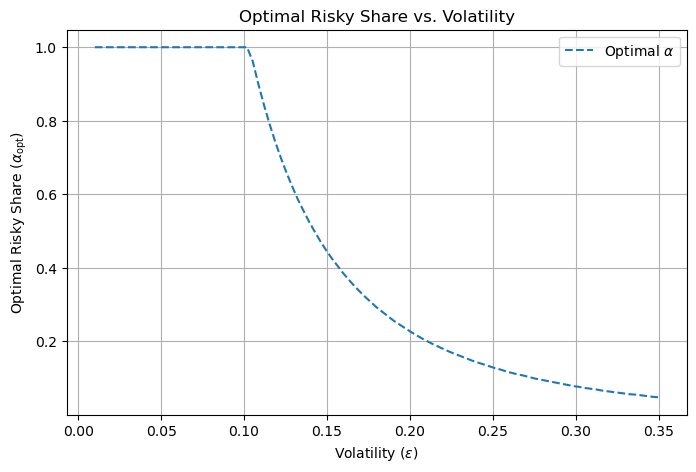

In [11]:
def analyze_volatility_effect(
    epsilon_min=0.01,
    epsilon_max=0.35,
    epsilon_points=101,
    beta=0.9,
    gamma=3.0,
    mu=0.06,
    w=1.0,
):
    """
    Computes and plots the optimal risky share alpha for a range of epsilon values.
    Only alpha is unpacked from the `find_optimum` function.

    Parameters
    ----------
    epsilon_min : float
        Minimum epsilon in the grid.
        Default: 0.01
    epsilon_max : float
        Maximum epsilon in the grid.
        Default: 0.35
    epsilon_points : int
        Number of epsilon points.
        Default: 101
    beta : float
        Discount factor.
        Default: 0.9
    gamma : float
        Risk aversion parameter.
        Default: 3.0
    mu : float
        Risk premium parameter.
        Default: 0.06
    w : float
        Initial wealth.
        Default: 1.0

    Returns
    -------
    None
        Displays a matplotlib plot of the optimal risky share alpha vs. volatility epsilon.
    """

    # Create a grid for epsilon values
    epsilon_grid = np.linspace(epsilon_min, epsilon_max, epsilon_points)

    # Array to store the optimal alpha (empty initially)
    alpha_opt_array = np.zeros(epsilon_points)

    # Loop over epsilon values and find the optimal alpha for each
    for i, eps_val in enumerate(epsilon_grid):  # Enumerate to get both index and value
        # Use find_optimum to get the best alpha.
        # For this task, we care about alpha.
        _, alpha_opt, _ = find_optimum(
            beta=beta, gamma=gamma, epsilon=eps_val, mu=mu, w=w
        )
        # Store the optimal alpha in the array for plotting
        alpha_opt_array[i] = alpha_opt

    # Plot alpha_opt as a function of epsilon
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.plot(
        epsilon_grid, alpha_opt_array, label=r"Optimal $\alpha$", ls="--"
    )  # Plot the optimal alpha
    plt.xlabel(r"Volatility $(\epsilon)$")  # Set the x-axis label
    plt.ylabel(r"Optimal Risky Share $(\alpha_\text{opt})$")  # Set the y-axis label
    plt.title("Optimal Risky Share vs. Volatility")  # Set the title
    plt.grid(True)  # Add grid
    plt.legend()  # Add legend
    plt.show()  # Show the plot


# Run the function to analyze the impact of volatility
analyze_volatility_effect()

### <ins>**Limitations of the Model**</ins>

Under normal market conditions, increased asset volatility is often associated with **higher expected returns**, leading to a **higher risk premium**. More volatile assets generally require higher compensation in terms of expected return to be attractive to investors.

However, **this model does not capture the relationship between volatility and expected returns**. Instead, expected returns are treated as **independent** of volatility, meaning that increased volatility **only leads to lower $E[R]$**. The investor perceives higher risk but does not receive a corresponding increase in expected return to compensate for the added uncertainty.

Had the model incorporated a mechanism where **higher volatility increased expected returns**, **risk-seeking investors $\gamma < 0$ could have increased their allocation to the risky asset as volatility rose**. This would have allowed us to analyze a scenario where **risk-seeking investors actively prefer higher volatility**. However, in the current model, this effect is absent, and increased volatility only leads to a reduction in the optimal risky share.

### <ins>**Graph Discussion**</ins>:

The optimal risky share, $\alpha_\text{opt}$, **decreases with increasing volatility** $ \epsilon $. In the graph:

- For **low volatility** ($ \epsilon \le 0.1 $), the investor allocates **all** savings to the risky asset.
- As **volatility increases** ($ \epsilon $ rises), the risky asset's returns become more uncertain. Given the investor's risk aversion ($ \gamma = 3 $), they reduce their allocation to the risky asset.

Since the model assumes a **constant risk aversion parameter** $ \gamma = 3 $, the investor exhibits **decreasing marginal utility of wealth**. This means they require a **higher risk premium** to compensate for increased risk, leading to **a lower optimal allocation to the risky asset** as volatility rises.


<ins>**Risk-Neutral and Risk-Seeking Scenarios**</ins>:

- **Risk-Neutral** ($\gamma = 0$): A risk-neutral investor **only considers expected returns**, without regard for risk. If the expected return of the risky asset is greater than the risk-free rate ($R_f = 1$), the investor **allocates all wealth to the risky asset**, making $\alpha_{\text{opt}}$ constant with respect to volatility. This occurs because the CRRA utility function simplifies to $u(c) = c$, meaning the investor does not penalize variance — only the mean return matters. I have included a graph to illustrate this scenario below, where the investor's preferences change at a critical point but remain constant thereafter (assuming $\epsilon = 0.02$).

- **Risk-Seeking** ($\gamma < 0$): A risk-seeking investor actively prefers risk. If the model allowed expected returns to increase with volatility, **risk-seeking investors would allocate more to the risky asset as volatility increases**. However, since the model does not capture this relationship, it is not possible to analyze the behavior of risk-seeking investors in this setting.

---

This limitation highlights a key assumption in the model: **the lack of a relationship between volatility and expected return**. If this relationship were incorporated, the behavior of risk-neutral and risk-seeking investors could be analyzed in a more realistic setting when faced with changing asset volatility.


In [ ]:
# Finding the turing point where the optimal risky share changes for a risk neutral investor
# Define the mu symbol
mu_symbol = sp.symbols("mu")

# Equation
equation = sp.Eq(expected_return(mu=mu_symbol, epsilon=0.2), Rf)

# Solve for mu
mu_risk_neutral = sp.solve(equation, mu_symbol)[0]

# Print the result
print(f"Risk-neutral mu value: {mu_risk_neutral:.3f}")
# Print the expected return with the risk-neutral mu value
print(
    f"Expected return with mu = {mu_risk_neutral:.3f}: {expected_return(mu_risk_neutral, epsilon=0.2):.3f} = R_f = {Rf:.3f}"
)

Risk-neutral mu value: 0.020
Expected return with mu = 0.020: 1.000 = R_f = 1.000


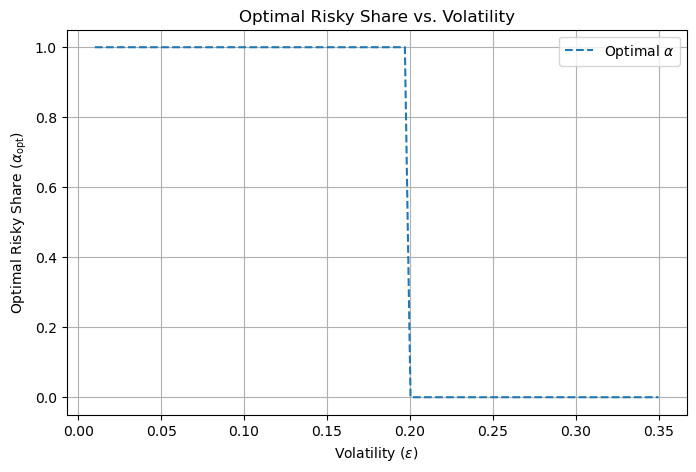

In [13]:
# Plot of the risk neutral scenario
gamma_risk_neutral = 0
analyze_volatility_effect(gamma=gamma_risk_neutral, mu=0.02)